Copyright (c) 2022 Mitsuru Ohno  
Use of this source code is governed by a BSD-3-style  
license that can be found in the LICENSE file.  
  
05/11/2025, M. Ohno  
an example script of monomer categolization and polymer generation from a list of small molecule compounds given as SMILES.    

In [1]:
import numpy as np
import pandas as pd
import time
import random

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw  #for display the structure
from smipoly.smip import monc, polg

## **Load input file**

In [3]:
#load input file
df = pd.read_csv("https://raw.githubusercontent.com/PEJpOhno/SMiPoly/main/sample_data/202207_smip_monset.csv") #sample monomer list on GitHub  
df

,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol"
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol"
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine"
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid
...,...,...,...,...,...
1078,CID91972128,C22H10N4,330.30,C=CC1=CC2=C(C=C1)C(=C(C#N)C#N)C3=CC=CC=C3C2=C(...,2-[10-(dicyanomethylidene)-3-ethenylanthracen-...
1079,CID102529357,C14H30O5Si,306.47,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,trimethoxy-[8-(oxiran-2-ylmethoxy)octyl]silane
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...


## **Classify monomers**  

In [4]:
classified_monomer_df = monc.moncls(df, smiColn="SMILES", minFG=2, maxFG=4, dsp_rsl=True)

1
vinyl  =  462  /  1085
2
epo  =  71  /  1085
3
cOle  =  52  /  1085
4
lactone  =  13  /  1085
5
lactam  =  1  /  1085
6
hydCOOH  =  7  /  1085
7
aminCOOH  =  1  /  1085
8
hindPhenol  =  8  /  1085
9
cAnhyd  =  33  /  1085
10
CO  =  1  /  1085
11
HCHO  =  1  /  1085
12
sfonediX  =  4  /  1085
13
BzodiF  =  1  /  1085
51
diepo  =  14  /  1085
52
diCOOH  =  85  /  1085
53
diol  =  162  /  1085
54
diamin  =  150  /  1085
55
diNCO  =  19  /  1085
56
dicAnhyd  =  28  /  1085
57
pridiamin  =  143  /  1085
58
diol_b  =  132  /  1085


In [5]:
classified_monomer_df

,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName,smip_cand_mons,vinyl,epo,cOle,lactone,...,sfonediX,BzodiF,diepo,diCOOH,diol,diamin,diNCO,dicAnhyd,pridiamin,diol_b
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol",OCCO,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid,O=C(O)CCCCC(=O)O,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol",CC(O)C(C)O,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine",NCCCCCN,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid,O=C(O)C#CC(=O)O,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C=C,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1082,CID138112368,C14H24F6N2O6S2+,494.50,CCCC[N+](C)(C)CCOC(=O)C(=C)C.C(F)(F)(F)S(=O)(=...,butyl-dimethyl-[2-(2-methylprop-2-enoyloxy)eth...,C=C(C)C(=O)OCC[N+](C)(C)CCCC.O=S(=O)([N]S(=O)(...,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1083,NaN,NaN,NaN,[C-]#[O+],NaN,[C-]#[O+],False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **Generate polymers**  

In [6]:
#read source DataFrame
tpstart = time.perf_counter()
generated_polymers_df = polg.biplym(classified_monomer_df, targ=["polyether"], dsp_rsl=True)
tpend = time.perf_counter()
tm = tpend-tpstart
print("CPU time: ", tm)
print(f"generated_polymers_df memory usage: {generated_polymers_df.memory_usage(deep=True).sum() / 1024 ** 2} MB")

number of polymerization reactions =  739
number of generated polymers =  868
CPU time:  33.07836619999944
generated_polymers_df memory usage: 0.34790992736816406 MB


In [7]:
generated_polymers_df

,mon1,mon2,polym,polymer_class,Ps_rxnL,reactset
0,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,,*CC(COc1ccc(C(C)(C)c2ccc(OCC(*)CO*)cc2)cc1)O*,polyether,2,"(, CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1)"
1,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,,*CC(COc1ccc(C(C)(C)c2ccc(OCC(C*)O*)cc2)cc1)O*,polyether,2,"(, CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1)"
2,C1CO1,,*CCO*,polyether,2,"(, C1CO1)"
3,CC1CO1,,*OCC(*)C,polyether,2,"(, CC1CO1)"
4,CC1CO1,,*CC(C)O*,polyether,2,"(, CC1CO1)"
...,...,...,...,...,...,...
863,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br,*Oc1ccc(-c2ccc(Oc3ccc(C(=O)c4ccc(*)cc4)cc3)c(B...,polyether,115,"(Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br, O=C(c1ccc(F)cc..."
864,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1CC...,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1C...
865,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)cc1O,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)c...
866,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)cc1O,*Oc1ccc(C2(c3ccc(O*)c(Oc4ccc(C(=O)c5ccc(*)cc5)...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)c...


### Extract linear polymer

In [8]:
#extract linear polymer
extract_linear_df = generated_polymers_df[generated_polymers_df['polym'].apply(lambda x:x.count('*')==2)]
linear_polymers_df = extract_linear_df.drop_duplicates(subset=['polym'])
linear_polymers_df

,mon1,mon2,polym,polymer_class,Ps_rxnL,reactset
2,C1CO1,,*CCO*,polyether,2,"(, C1CO1)"
3,CC1CO1,,*OCC(*)C,polyether,2,"(, CC1CO1)"
4,CC1CO1,,*CC(C)O*,polyether,2,"(, CC1CO1)"
5,c1ccc(C2CO2)cc1,,*OCC(*)c1ccccc1,polyether,2,"(, c1ccc(C2CO2)cc1)"
6,c1ccc(C2CO2)cc1,,*CC(O*)c1ccccc1,polyether,2,"(, c1ccc(C2CO2)cc1)"
...,...,...,...,...,...,...
861,O=C(c1ccc(F)cc1)c1ccc(F)cc1,OCCC1CCC(O)CC1,*OC1CCC(CCOc2ccc(C(=O)c3ccc(*)cc3)cc2)CC1,polyether,115,"(OCCC1CCC(O)CC1, O=C(c1ccc(F)cc1)c1ccc(F)cc1)"
862,O=C(c1ccc(F)cc1)c1ccc(F)cc1,OCCC1CCC(O)CC1,*OCCC1CCC(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)CC1,polyether,115,"(OCCC1CCC(O)CC1, O=C(c1ccc(F)cc1)c1ccc(F)cc1)"
863,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br,*Oc1ccc(-c2ccc(Oc3ccc(C(=O)c4ccc(*)cc4)cc3)c(B...,polyether,115,"(Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br, O=C(c1ccc(F)cc..."
864,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1CC...,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1C...


### an example of generated polymer and polynerization reaction  

C:\Users\mitoh\DataScience\venvs\20250503_smiptest\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


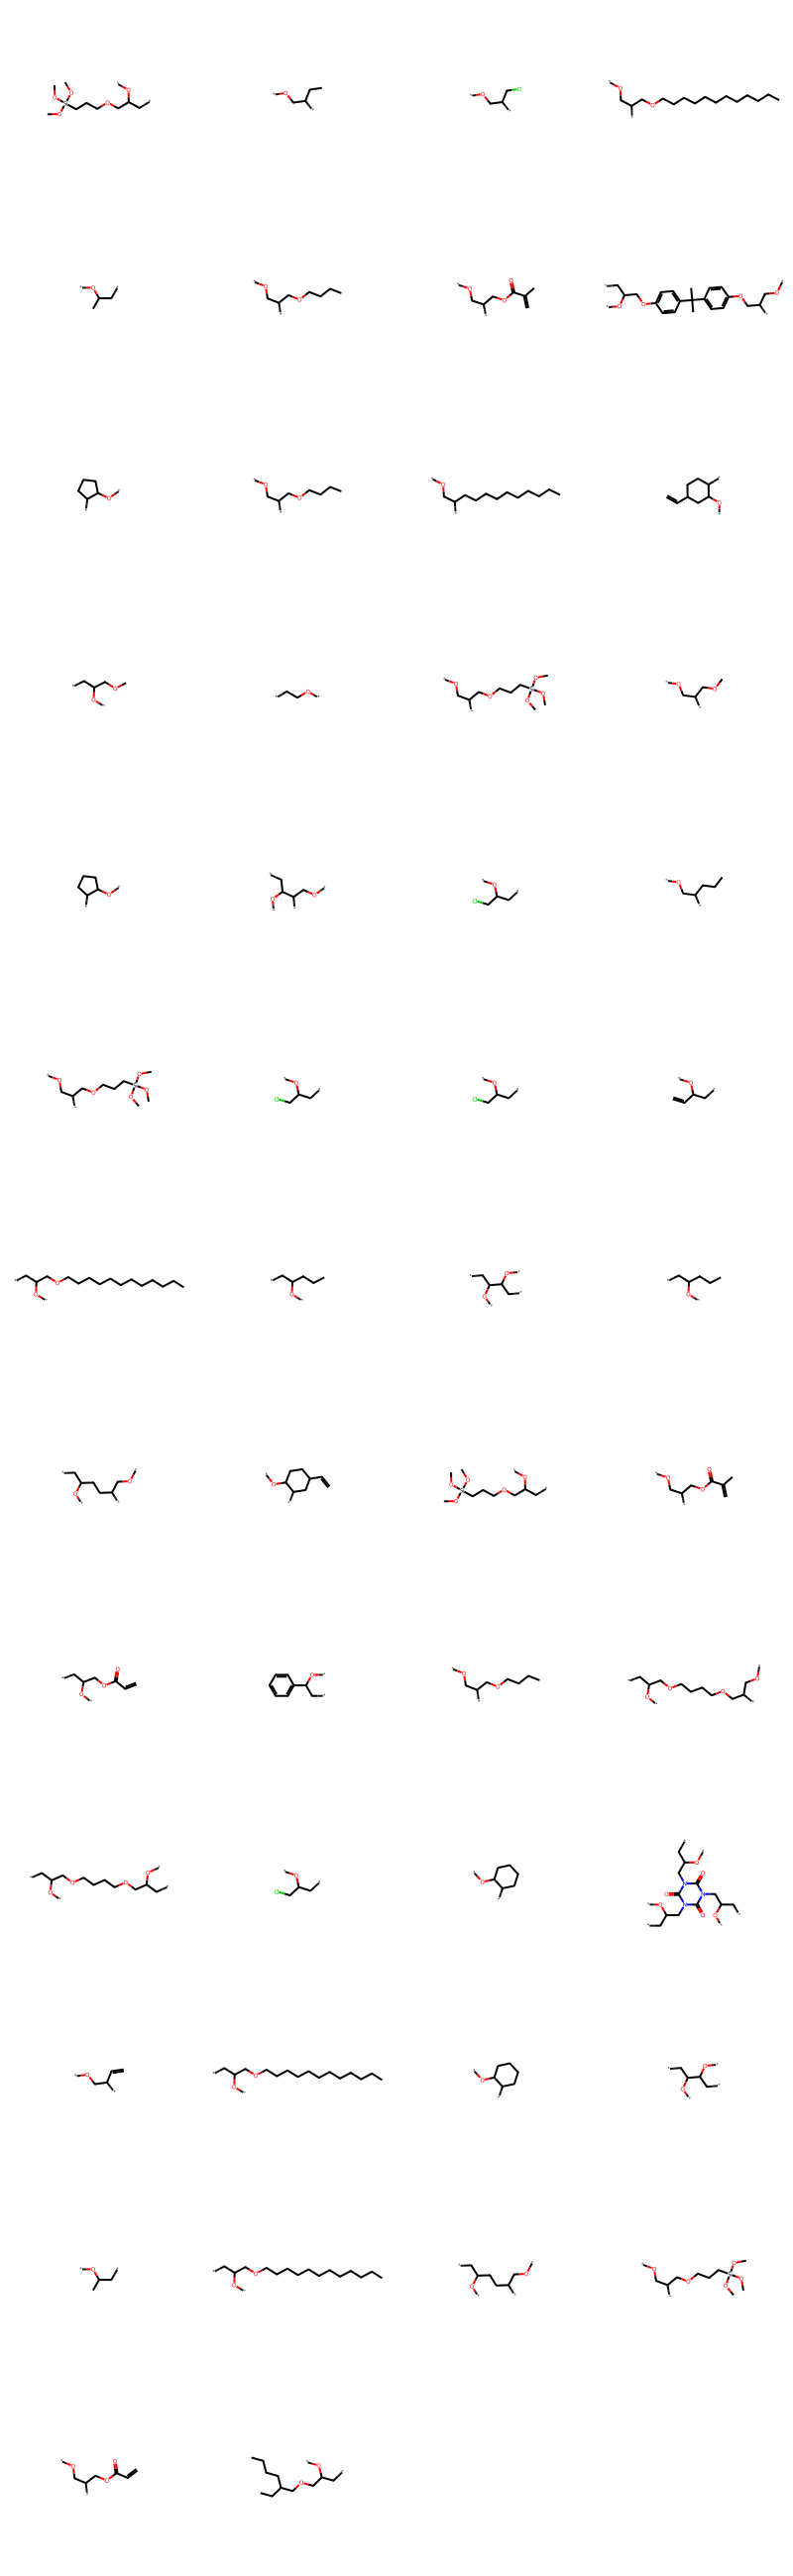

In [9]:
#Draw examples of generated polymer CRU
pickupNos = [random.randint(0, 50) for i in range(len(generated_polymers_df))]
examP = [Chem.MolFromSmiles(generated_polymers_df.iloc[i, 2]) for i in pickupNos]
Draw.MolsToGridImage(examP,molsPerRow=4, subImgSize=(200,200))

193


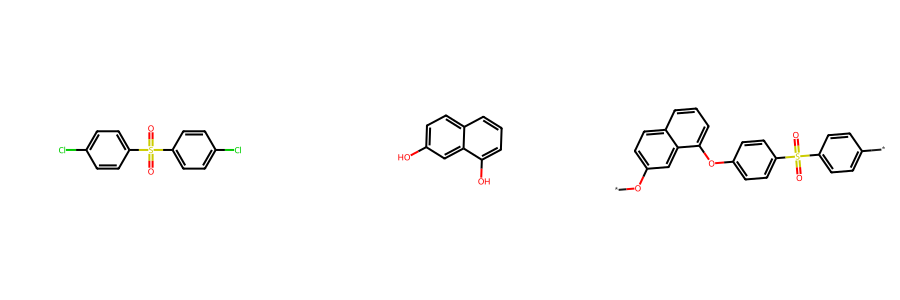

In [10]:
#Draw example of generated polymerization reaction
pickupNo = int(random.randint(0,len(generated_polymers_df)))
print(pickupNo)
m1=Chem.MolFromSmiles(generated_polymers_df.iloc[pickupNo,0])
m2=Chem.MolFromSmiles(generated_polymers_df.iloc[pickupNo,1])
p=Chem.MolFromSmiles(generated_polymers_df.iloc[pickupNo,2])
if generated_polymers_df.iloc[pickupNo,1] != '':
    L = [m1, m2, p]
else:
    m2 = Chem.MolFromSmiles('') #None
    L = [m1, m2, p]
Draw.MolsToGridImage(L,molsPerRow=3, subImgSize=(300,300))

## **Classify olefins in more detail**

In [11]:
classified_olefins_df = monc.olecls(df, smiColn="SMILES", minFG=1, maxFG=4, dsp_rsl=True)
classified_olefins_df

['acryl', 'bEWole', 'styryl', 'allyl', 'haloCH', 'vinylester', 'malei', 'conjdiene', 'vinylether', 'tertcatCH', 'cycCH', 'aliphCH']
acryl  =  221  /  1083
bEWole  =  4  /  1083
styryl  =  54  /  1083
allyl  =  76  /  1083
haloCH  =  3  /  1083
vinylester  =  26  /  1083
malei  =  18  /  1083
conjdiene  =  3  /  1083
vinylether  =  20  /  1083
tertcatCH  =  1  /  1083
cycCH  =  10  /  1083
aliphCH  =  19  /  1083


,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName,smip_cand_mons,ole_cls
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol",OCCO,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid,O=C(O)CCCCC(=O)O,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol",CC(O)C(C)O,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine",NCCCCCN,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid,O=C(O)C#CC(=O)O,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
...,...,...,...,...,...,...,...
1078,CID91972128,C22H10N4,330.30,C=CC1=CC2=C(C=C1)C(=C(C#N)C#N)C3=CC=CC=C3C2=C(...,2-[10-(dicyanomethylidene)-3-ethenylanthracen-...,C=Cc1ccc2c(=C(C#N)C#N)c3ccccc3c(=C(C#N)C#N)c2c1,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
1079,CID102529357,C14H30O5Si,306.47,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,trimethoxy-[8-(oxiran-2-ylmethoxy)octyl]silane,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C=C,"{'acryl': [True, 1, '*CC(*)C(=O)OCCC[Si](CC=C)..."
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C,"{'acryl': [True, 1, '*CC(*)(C)C(=O)OCCC[Si](CC..."


## **Generate olefinic (co)polymers**

In [12]:
olefinic_polymers_df = polg.ole_copolym(classified_olefins_df, targ=["ROMP"], ncomp=1, dsp_rsl=True)
olefinic_polymers_df


 valid olefinic arguments 
 ['acryl', 'bEWole', 'styryl', 'allyl', 'haloCH', 'vinylester', 'malei', 'conjdiene', 'vinylether', 'tertcatCH', 'cycCH', 'aliphCH'] ,
 ('ROMP', 'ROMPH', 'COC') 

Number of generated (co)polymer,  1  component(s) system :  21


,mon1,mon2,polym,polymer_class,Ps_rxnL,reactset
0,,,[*C=CC1CC(*)C2C=CCC12],[cycCH],[ROMP],[C1=CC2C3C=CC(C3)C2C1]
1,,,[*C=CC1C2C=CC(C2)C1C*],[cycCH],[ROMP],[C1=CC2C3C=CC(C3)C2C1]
2,,,[*C=CCC1C2C=CC(C2)C1*],[cycCH],[ROMP],[C1=CC2C3C=CC(C3)C2C1]
3,,,[*C=CC1CC(*)C2CC=CC12],[cycCH],[ROMP],[C1=CC2C3C=CC(C3)C2C1]
4,,,[*C=CCC(C=C)CC*],[cycCH],[ROMP],[C=CC1CC=CCC1]
5,,,[*C=CCCC(C=C)C*],[cycCH],[ROMP],[C=CC1CC=CCC1]
6,,,[*C=CC1C=CC(*)C1],[cycCH],[ROMP],[C1=CC2C=CC1C2]
7,,,[*C=CC1CCC(*)C1],[cycCH],[ROMP],[C1=CC2CCC1C2]
8,,,[*C=CC1CC(*)C(C=C)C1],[cycCH],[ROMP],[C=CC1CC2C=CC1C2]
9,,,[*C=CC1CC(*)CC1C=C],[cycCH],[ROMP],[C=CC1CC2C=CC1C2]


0


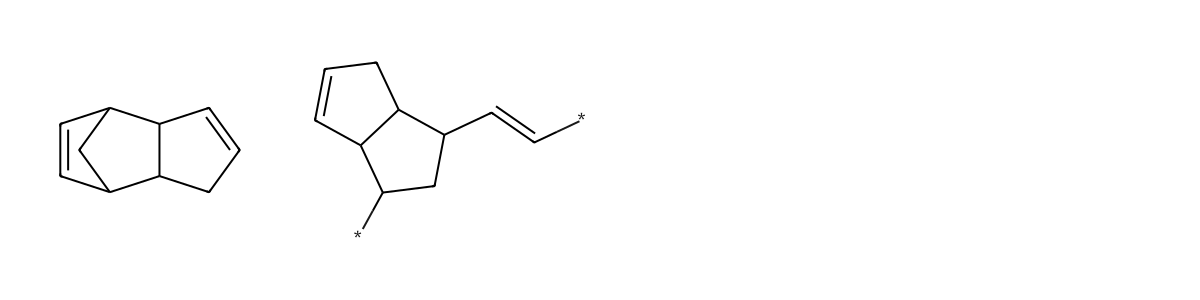

In [13]:
#Draw example of generated polymerization reaction
pickupNo = int(random.randint(0,len(olefinic_polymers_df)-1))
print(pickupNo)

m3 = [Chem.MolFromSmiles(m) for m in olefinic_polymers_df.iloc[pickupNo,2]]
m4 = [Chem.MolFromSmiles(m) for m in olefinic_polymers_df.iloc[pickupNo,5]]
L_ole = m4+m3
Draw.MolsToGridImage(L_ole,molsPerRow=4, subImgSize=(300,300))

In [14]:
#end